### Import Libraries

In [81]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
%matplotlib notebook

### Load Dataset

In [82]:
dataset_path = './fake_news.json'
news_df = pd.read_json(dataset_path,lines=True)

# Checking whether dataset is properly loaded
print(news_df.head(10))

len(news_df)

print(type(news_df['headline'][0]))

   is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   
5             0                               my white inheritance   
6             0         5 ways to file your taxes with less stress   
7             1  richard branson's global-warming donation near...   
8             1  shadow government getting too large to meet in...   
9             0                 lots of parents know this scenario   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https:

### Split train, val and test sets

In [83]:
train_df, rem_df = train_test_split(news_df, test_size=0.25,shuffle=True,random_state=12)

val_df, test_df = train_test_split(rem_df, test_size=0.5,shuffle=True,random_state=12)

target_names = ['sarcastic','not_sarcastic']

In [84]:
print('Size of Train Set', len(train_df))
print('Size of Validation Set',len(val_df))
print('Size of Test Set',len(test_df))

Size of Train Set 21464
Size of Validation Set 3577
Size of Test Set 3578


### Preprocessing the Dataset

In [85]:
def preprocess_dataset(df):
    
    processed_headline_list = []
    headline_len_list = []
    
    for index,row in df.iterrows():
        
        #Calculate headline length
        head_len = len(row['headline'])
        
        # Remove all the special characters
        processed_headline = re.sub(r'\W', ' ', str(row['headline']))
        
        # remove all single characters
        processed_headline = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_headline)
        
        # Remove single characters from the start
        processed_headline = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_headline) 
 
        # Substituting multiple spaces with single space
        processed_headline = re.sub(r'\s+', ' ', processed_headline, flags=re.I)
 
        # Converting to Lowercase
        processed_headline = processed_headline.lower()
 
        processed_headline_list.append(processed_headline)
        headline_len_list.append(head_len)
    
    df['processed_headline'] = processed_headline_list
    df['headline_length'] = headline_len_list
    
    return df

In [86]:
train_df = preprocess_dataset(train_df)
val_df = preprocess_dataset(val_df)
test_df = preprocess_dataset(test_df)

train_val_combined_df = pd.concat([train_df, val_df], ignore_index=True)


print(train_df.head(5))
print(val_df.head(5))
print(test_df.head(5))

<ipython-input-85-7911cd3d6acf>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_headline'] = processed_headline_list
<ipython-input-85-7911cd3d6acf>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['headline_length'] = headline_len_list


       is_sarcastic                                           headline  \
18441             1  poll finds americans would be open to third ty...   
2815              1  bernie sanders asks anyone who's serious about...   
25406             0  brazilian 'surfer angel' considered for sainthood   
26462             0                        rest in peace leelah alcorn   
14520             1  ice agent can't believe he being reprimanded f...   

                                            article_link  \
18441  https://www.theonion.com/poll-finds-americans-...   
2815   https://politics.theonion.com/bernie-sanders-a...   
25406  https://www.huffingtonpost.com/entry/surfer-an...   
26462  https://www.huffingtonpost.com/entry/rest-in-p...   
14520  https://www.theonion.com/ice-agent-can-t-belie...   

                                      processed_headline  headline_length  
18441  poll finds americans would be open to third ty...               68  
2815   bernie sanders asks anyone who seri

### Exploratory Data Analysis

#### Raw Headline

In [87]:
#Find the top-20 most frequently used words in real and fake headlines and use a bar plot to show 
# their relative frequencies. #What can you say about these words? What changes when stop words are removed?

train_real_headlines = train_df[train_df['is_sarcastic']==0]
train_fake_headlines = train_df[train_df['is_sarcastic']==1]

from collections import Counter
from nltk.tokenize import word_tokenize

real = train_real_headlines['processed_headline'].tolist()
fake = train_fake_headlines['processed_headline'].tolist()

real_word_list = [word for line in real for word in line.split()]
fake_word_list = [word for line in fake for word in line.split()]

real_word_count = Counter(real_word_list)
fake_word_count = Counter(fake_word_list)

print(real_word_count.most_common(20))
print()
print(fake_word_count.most_common(20))

[('the', 3504), ('to', 3066), ('of', 1864), ('in', 1848), ('for', 1430), ('and', 1243), ('is', 1133), ('trump', 1090), ('on', 998), ('with', 722), ('you', 671), ('this', 523), ('new', 515), ('at', 496), ('from', 493), ('how', 491), ('it', 474), ('about', 473), ('are', 426), ('your', 404)]

[('to', 3755), ('of', 2887), ('in', 1595), ('for', 1323), ('on', 963), ('man', 956), ('new', 776), ('with', 752), ('the', 581), ('by', 567), ('at', 521), ('he', 519), ('from', 496), ('out', 447), ('up', 432), ('after', 430), ('it', 424), ('report', 389), ('about', 367), ('as', 361)]


<IPython.core.display.Javascript object>


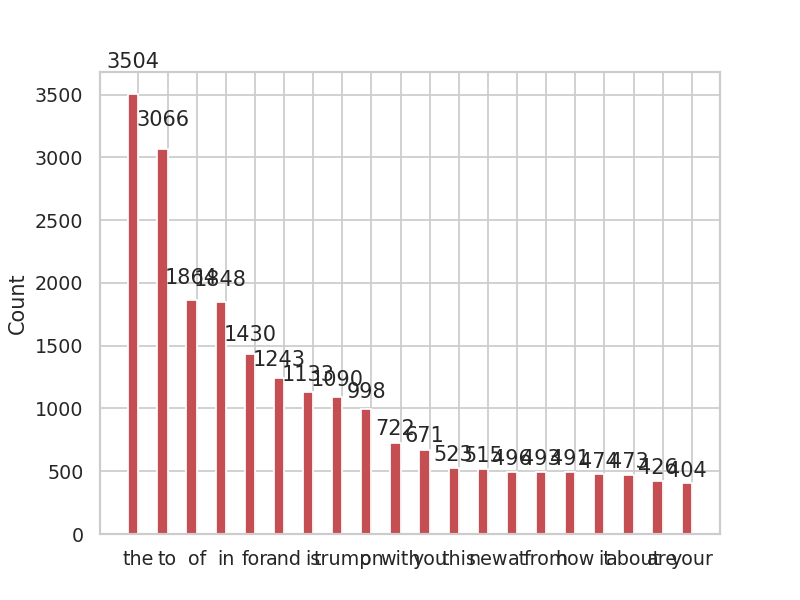

<IPython.core.display.Javascript object>


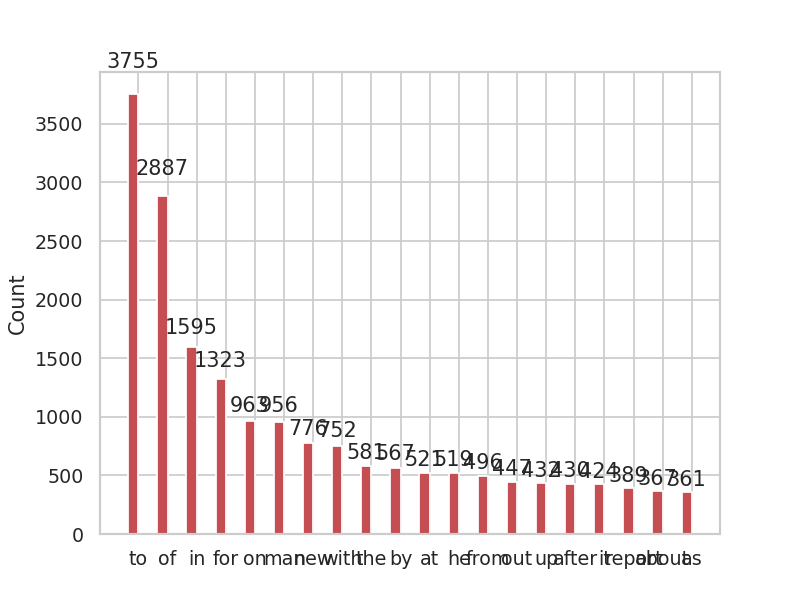

In [88]:
# Plot the most frequent words
def plot_common_words(common_word_list):
    
    names, values = zip(*common_word_list)  

    ind = np.arange(len(common_word_list))
    width = 0.35

    fig, ax = plt.subplots()
    rects = ax.bar(ind, values, width, color='r')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Count')
    ax.set_xticks(ind+width/2.)
    ax.set_xticklabels(names)

    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

        
        
plot_common_words(real_word_count.most_common(20))
plot_common_words(fake_word_count.most_common(20))

#### Headlines Without Stop Words

[('trump', 1090), ('new', 515), ('donald', 355), ('says', 263), ('women', 233), ('one', 198), ('people', 195), ('year', 185), ('world', 184), ('man', 175), ('first', 171), ('obama', 170), ('day', 163), ('black', 161), ('gop', 161), ('5', 161), ('like', 159), ('make', 158), ('life', 151), ('clinton', 151)]

[('man', 956), ('new', 776), ('report', 389), ('area', 360), ('trump', 290), ('nation', 288), ('woman', 278), ('year', 264), ('one', 238), ('time', 232), ('old', 223), ('day', 215), ('like', 186), ('still', 184), ('first', 180), ('study', 176), ('get', 170), ('house', 168), ('finds', 165), ('back', 163)]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ayushrai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<IPython.core.display.Javascript object>


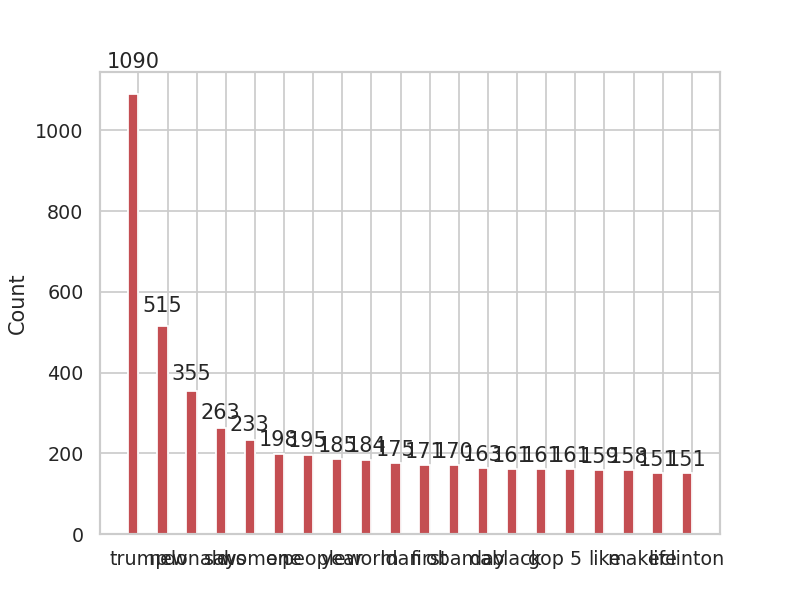

<IPython.core.display.Javascript object>


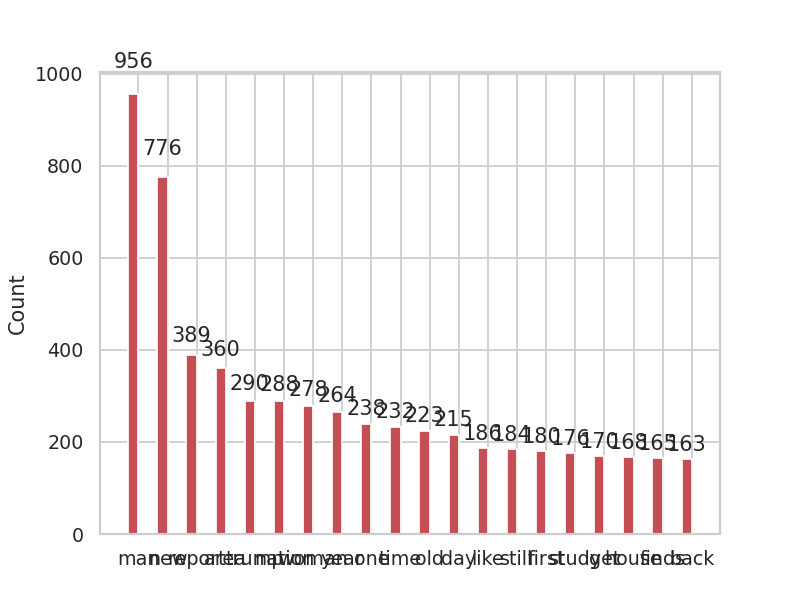

In [89]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords  

stop_words = set(stopwords.words('english'))  

filtered_real_word_list = [w for w in real_word_list if not w in stop_words]
filtered_fake_word_list = [w for w in fake_word_list if not w in stop_words]  

filtered_real_word_count = Counter(filtered_real_word_list)
filtered_fake_word_count = Counter(filtered_fake_word_list)


print(filtered_real_word_count.most_common(20))
print()
print(filtered_fake_word_count.most_common(20))

plot_common_words(filtered_real_word_count.most_common(20))
plot_common_words(filtered_fake_word_count.most_common(20))

### Length Distribution

<IPython.core.display.Javascript object>


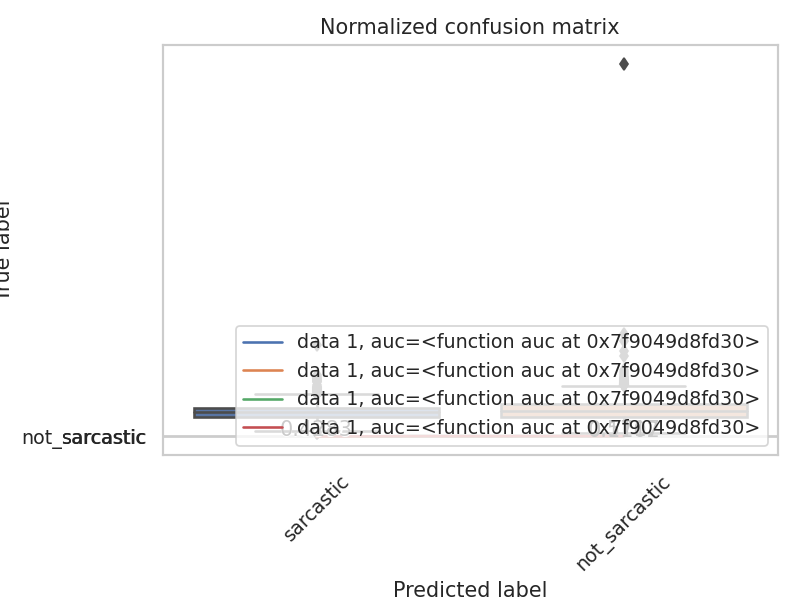

In [90]:
#Compare the distribution of headline lengths in real and fake headlines using appropriate plots (e.g. a boxplot).
# Are fake headlines usually shorter or longer? Document all your findings 
# and any other interesting observations that you can find.

# Plot BoxPlot for Length
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots()
ax = sns.boxplot(x="is_sarcastic", y="headline_length", data=train_df)

In [25]:
## Fake News and Stories are shorter than Real News in general.

### Feature Extraction

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer  

tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  

train_features = tfidfconverter.fit_transform(train_df['processed_headline']).toarray()
y_train = np.array(train_df['is_sarcastic'].tolist())


val_features = tfidfconverter.transform(val_df['processed_headline']).toarray()
y_val = np.array(val_df['is_sarcastic'].tolist())

test_features = tfidfconverter.transform(test_df['processed_headline']).toarray()
y_test = np.array(test_df['is_sarcastic'].tolist())



### Supervised Classification

In [106]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import itertools
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import NuSVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc, f1_score
from lightgbm import LGBMClassifier

#-------------------------------------------------------------------------------------------------------------------------------

def apply_xgboost_gradient_boosting(X_train_preprocessed, X_test_preprocessed, y_train, y_test,class_names_list):

    print('Applying XGBoost Gradient Boosting')

    model = XGBClassifier()
    model.fit(X_train_preprocessed, y_train)

    y_test_pred_values = model.predict(X_test_preprocessed)
    y_test_pred = [int(value) for value in y_test_pred_values]

    # Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)

    print('The accuracy achieved by the Gradient Boosting Model from XgBoost is: ', acc)
    
    #------------
    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print('The F1 Score achieved by the Gradient Boosting Model from XgBoost is:', f1score)
    
    #Compute Area Under ROC Curve
    plt.figure(figsize=(5,5))
    fpr, tpr, thresholds = roc_curve(y_test_pred, y_test)
    roc_auc = auc(fpr, tpr)
    print('The ROC Curve for Gradient Boosting Model is:', roc_auc)
    plt.plot(fpr,tpr, label = "auc= "+str(roc_auc))
    plt.legend(loc=4)
    plt.savefig('xgboost_'+'roc_curve.png')
    
    
    # Computing Confusion Matrix
    cnf_matrix = confusion_matrix(y_test, y_test_pred)
    #print cnf_matrix
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    #plt.figure()
    #plot_confusion_matrix(cnf_matrix, target_names=class_names_list,title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    #plt.figure()
    plot_confusion_matrix(cnf_matrix, target_names=class_names_list, ml_model='xgboost' ,normalize=True, title='Normalized confusion matrix')

    return model, acc

#--------------------------------------------------------------------------------------------------------------------------------

def apply_adaboost_classifier(X_train_preprocessed, X_test_preprocessed, y_train, y_test,class_names_list):

    ##TO DO : Testing Hyper Parameters and Cross Validation

    print('Applying AdaBoost Classifier')

    # Training the classifier
    classifier = AdaBoostClassifier(n_estimators=100)
    classifier = classifier.fit(X_train_preprocessed,y_train)

    # Testing the classifier on Test Data
    y_test_pred = classifier.predict(X_test_preprocessed) 

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)

    print('The accuracy achieved by the Adaboost Classifier Model is: ', acc)
    
    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print('The F1 Score achieved by the Adaboost Classifier Model is:', f1score)
    
    #Compute Area Under ROC Curve
    plt.figure(figsize=(5,5))
    fpr, tpr, thresholds = roc_curve(y_test_pred, y_test)
    roc_auc = auc(fpr, tpr)
    print('The ROC Curve for Adaboost Classifier Model is:', roc_auc)
    plt.plot(fpr,tpr, label = "auc= "+str(roc_auc))
    plt.legend(loc=4)
    plt.savefig('adaboost_'+'roc_curve.png')
    
    
    # Computing Confusion Matrix
    cnf_matrix = confusion_matrix(y_test, y_test_pred)
    #print cnf_matrix
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    #plt.figure()
    #plot_confusion_matrix(cnf_matrix, target_names=class_names_list,title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    #plt.figure()
    plot_confusion_matrix(cnf_matrix, target_names=class_names_list, ml_model='adaboost' ,normalize=True, title='Normalized confusion matrix')

    return classifier, acc

#---------------------------------------------------------------------------------------------------------------------------------

def apply_gradient_boosting(X_train_preprocessed, X_test_preprocessed, y_train, y_test,class_names_list):

    ##TO DO : Testing Hyper Parameters and Cross Validation

    print('Applying Gradient Boosting')

    # Training the classifier
    classifier = GradientBoostingClassifier(n_estimators=100)
    classifier = classifier.fit(X_train_preprocessed,y_train)

    # Testing the classifier on Test Data
    y_test_pred = classifier.predict(X_test_preprocessed)

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)

    print('The accuracy achieved by the Gradient Boosting Classifier Model is: ', acc)
    
    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print('The F1 Score achieved by the Gradient Boosting Classifier Model is:', f1score)
    
    #Compute Area Under ROC Curve
    plt.figure(figsize=(5,5))
    fpr, tpr, thresholds = roc_curve(y_test_pred, y_test)
    roc_auc = auc(fpr, tpr)
    print('The ROC Curve for Gradient Boosting Model is:', roc_auc)
    plt.plot(fpr,tpr, label = "auc= "+str(roc_auc))
    plt.legend(loc=4)
    plt.savefig('gradient_boosting_'+'roc_curve.png')
    
    
    # Computing Confusion Matrix
    cnf_matrix = confusion_matrix(y_test, y_test_pred)
    #print cnf_matrix
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    #plt.figure()
    #plot_confusion_matrix(cnf_matrix, target_names=class_names_list,title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    #fig, ax = plt.subplots()
    #plt.figure()
    plot_confusion_matrix(cnf_matrix, target_names=class_names_list, ml_model='gradient_boosting' ,normalize=True, title='Normalized confusion matrix')

    return classifier, acc

#--------------------------------------------------------------------------------------------------------------------------------

def apply_logistic_regression(X_train_preprocessed, X_test_preprocessed, y_train, y_test,class_names_list):

    ##TO DO : Testing Hyper Parameters and Cross Validation

    print('Applying Logistic Regression')

    # Training the classifier
    classifier = LogisticRegression()
    classifier = classifier.fit(X_train_preprocessed,y_train)

    # Testing the classifier on Test Data
    y_test_pred = classifier.predict(X_test_preprocessed)

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)

    print('The accuracy achieved by the Logistic Regression Classifier Model is: ', acc)
    
    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print('The F1 Score achieved by the Logistic Rgeression Classifier Model is:', f1score)
    
    #Compute Area Under ROC Curve
    plt.figure(figsize=(5,5))
    fpr, tpr, thresholds = roc_curve(y_test_pred, y_test)
    roc_auc = auc(fpr, tpr)
    print('The ROC Curve for Logistic Regression Classifier Model is:', roc_auc)
    plt.plot(fpr,tpr, label = "auc= "+str(roc_auc))
    plt.legend(loc=4)
    plt.savefig('logistic_regression_'+'roc_curve.png')
    
    # Computing Confusion Matrix
    cnf_matrix = confusion_matrix(y_test, y_test_pred)
    #print cnf_matrix
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    #plt.figure()
    #plot_confusion_matrix(cnf_matrix, target_names=class_names_list,title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    #plt.figure()
    plot_confusion_matrix(cnf_matrix, target_names=class_names_list, ml_model='logistic_regression' ,normalize=True, title='Normalized confusion matrix')

    return classifier, acc

#-------------------------------------------------------------------------------------------------------------------------------

def apply_data_preprocessing(train_features):

    # Apply Basic Preprocessing Steps

    print('Applying Data Preprocessing')

    min_max_scaler = preprocessing.MinMaxScaler()
    train_x_minmax = min_max_scaler.fit_transform(train_features)

    return train_x_minmax, min_max_scaler

#------------------------------------------------------------------------------------------------------------------------------------

def apply_hold_one_out_crossval(train_features,val_features,test_features,y_train,y_val,class_names_list):

    print('Apply Hold One Out Cross Validation!')

    #Apply Machine Learning Techinques and Cross Validation
    train_features_preprocessed, min_max_scaler = apply_data_preprocessing(train_features)

    #Val Feature Preprocessing
    val_features_preprocessed = min_max_scaler.transform(val_features)

    #Test Feature Preprocessing
    test_features_preprocessed = min_max_scaler.transform(test_features)

    model1, score1 = apply_xgboost_gradient_boosting(train_features_preprocessed, val_features_preprocessed, y_train, y_val,class_names_list)
    model2, score2 = apply_random_forest(train_features_preprocessed, val_features_preprocessed, y_train, y_val,class_names_list)
    model3, score3 = apply_lightgm(train_features_preprocessed, val_features_preprocessed, y_train, y_val,class_names_list) 
    model4, score4 = apply_gradient_boosting(train_features_preprocessed, val_features_preprocessed, y_train, y_val,class_names_list)
    model5, score5 = apply_logistic_regression(train_features_preprocessed, val_features_preprocessed, y_train, y_val,class_names_list)
    model6, score6 = apply_adaboost_classifier(train_features_preprocessed, val_features_preprocessed, y_train, y_val,class_names_list)

    all_model = [model1,model2,model3,model4,model5,model6]
    all_score = [score1,score2,score3,score4,score5,score6]

    max_score = max(all_score)

    model = all_model[all_score.index(max_score)]

    return model, test_features_preprocessed

#--------------------------------------------------------------------------------------------------------------------------------------

def apply_random_forest(X_train_preprocessed, X_test_preprocessed, y_train, y_test,class_names_list):

    ##TO DO : Testing Hyper Parameters and Cross Validation

    print('Applying Random Forest')

    # Training the classifier
    classifier = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
    classifier = classifier.fit(X_train_preprocessed,y_train)

    # Testing the classifier on Test Data
    y_test_pred = classifier.predict(X_test_preprocessed) 

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)

    print('The accuracy achieved by the Random Forest Classifier Model is: ', acc)
    
    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print('The F1 Score achieved by the Random Forest Classifier Model is:', f1score)
    
    #Compute Area Under ROC Curve
    plt.figure(figsize=(5,5))
    fpr, tpr, thresholds = roc_curve(y_test_pred, y_test)
    roc_auc = auc(fpr, tpr)
    print('The ROC Curve for Random Forest Classifier Model is:', roc_auc)
    plt.plot(fpr,tpr, label = "auc= "+str(roc_auc))
    plt.legend(loc=4)
    plt.savefig('random_forest_'+'roc_curve.png')
    
    # Computing Confusion Matrix
    cnf_matrix = confusion_matrix(y_test, y_test_pred)
    #print cnf_matrix
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    #plt.figure()
    #plot_confusion_matrix(cnf_matrix, target_names=class_names_list,title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    #plt.figure()
    plot_confusion_matrix(cnf_matrix, target_names=class_names_list, ml_model='random_forest' ,normalize=True, title='Normalized confusion matrix')

    return classifier, acc

#---------------------------------------------------------------------------------------------------------------

def apply_lightgm(X_train_preprocessed, X_test_preprocessed, y_train, y_test,class_names_list):

    print('Applying LightGM Classifier')
    
    num_iterations = 200
    
    classifier = LGBMClassifier(random_state=17, max_depth=-1,num_leaves=63, n_estimators=num_iterations,n_jobs=1)
    classifier = classifier.fit(X_train_preprocessed,y_train)

    # Testing the Classifier on Test Data
    y_test_pred = classifier.predict(X_test_preprocessed)
    
    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)

    print('The accuracy achieved by the LightBM Classifier Model is: ', acc)
    
    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print('The F1 Score achieved by the LightBM Classifier Model is:', f1score)
    
    #Compute Area Under ROC Curve
    plt.figure(figsize=(5,5))
    fpr, tpr, thresholds = roc_curve(y_test_pred, y_test)
    roc_auc = auc(fpr, tpr)
    print('The ROC Curve for LightBM Classifier Classifier Model is:', roc_auc)
    plt.plot(fpr,tpr, label = "auc= "+str(roc_auc))
    plt.legend(loc=4)
    plt.savefig('lightgm_'+'roc_curve.png')
    
    # Computing Confusion Matrix
    cnf_matrix = confusion_matrix(y_test, y_test_pred)
    #print cnf_matrix
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    #plt.figure()
    #plot_confusion_matrix(cnf_matrix, target_names=class_names_list,title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    #plt.figure()
    plot_confusion_matrix(cnf_matrix, target_names=class_names_list, ml_model='light_gm' ,normalize=True, title='Normalized confusion matrix')

    return classifier, acc

#---------------------------------------------------------------------------------------------------------------------------------------

def complete_training(train_features_full_reduced, train_targets):

    #Retrain the model using full training dataset

    print('Training on the complete Dataset')
    model = XGBClassifier()
    model.fit(train_features_full_reduced, train_targets)

    return model

#------------------------------------------------------------------------------------------------------------------------------------------

def test_evaluation(model,test_features_reduced,y_test):
    
    print('Test Set Evaluation')

    y_test_pred_values = model.predict(test_features_reduced)
    y_test_pred = [round(value) for value in y_test_pred_values]
    
    
    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)
    print('The accuracy achieved by the Tuned Classifier Model is: ', acc)

    #Compute F1 Score
    f1score = f1_score(y_test, y_test_pred,average='weighted')
    print('The F1 Score achieved by the Tuned Classifier Model is:', f1score)


#----------------------------------------------------------------------------------------------------------------------------------------------

def apply_stratified_kfold_crossval_grid_search(train_full_features,test_features,y_train,nsplit):
    
    #Apply Machine Learning Techinques and Cross Validation
    train_features_preprocessed, min_max_scaler = apply_data_preprocessing(train_features)
    
    test_features_preprocessed = min_max_scaler.transform(test_features)

    print('Apply Stratified Cross Validation and Grid Search')

    parameter_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

    xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

    cross_validation = StratifiedKFold(n_splits=nsplit)

    grid_search = GridSearchCV(xgb,
                              scoring='accuracy',
                              param_grid=parameter_grid,
                              cv=cross_validation,
                              verbose=1
                             )

    grid_search.fit(train_full_features, y_train)
    tuned_model = grid_search
    #parameters = grid_search.best_params_
    #print('Best score: {}'.format(grid_search.best_score_))
    #print('Best parameters: {}'.format(grid_search.best_params_))

    return tuned_model, test_features_preprocessed

#-------------------------------------------------------------------------------

def apply_stratified_kfold_crossval_random_search(train_full_features,test_features,y_train,nsplit):
    
    #Apply Machine Learning Techinques and Cross Validation
    train_features_preprocessed, min_max_scaler = apply_data_preprocessing(train_features)
    
    test_features_preprocessed = min_max_scaler.transform(test_features)

    print('Apply Stratified Cross Validation and Random Search')

    parameter_dist = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4]
        }

    xgb = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1)

    cross_validation = StratifiedKFold(n_splits=nsplit)

    random_search = RandomizedSearchCV(xgb,
                              scoring='accuracy',
                              param_distributions=parameter_dist,
                              cv=cross_validation,
                              verbose=1
                             )

    random_search.fit(train_full_features, y_train)
    tuned_model = random_search
    parameters = random_search.best_params_
    print('Best score: {}'.format(random_search.best_score_))
    print('Best parameters: {}'.format(random_search.best_params_))

    return tuned_model, test_features_preprocessed

#--------------------------------------------------------------------------------------------------------------------

#Plot Confusion Matrix

def plot_confusion_matrix(cm,
                          target_names,
                          ml_model,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig(ml_model + '_confusion_matrix.png')
    #plt.show()

### Hold One Out Cross Validation

Apply Hold One Out Cross Validation!
Applying Data Preprocessing
Applying XGBoost Gradient Boosting
The accuracy achieved by the Gradient Boosting Model from XgBoost is:  0.7402851551579536
The F1 Score achieved by the Gradient Boosting Model from XgBoost is: 0.7324312485755572


<IPython.core.display.Javascript object>


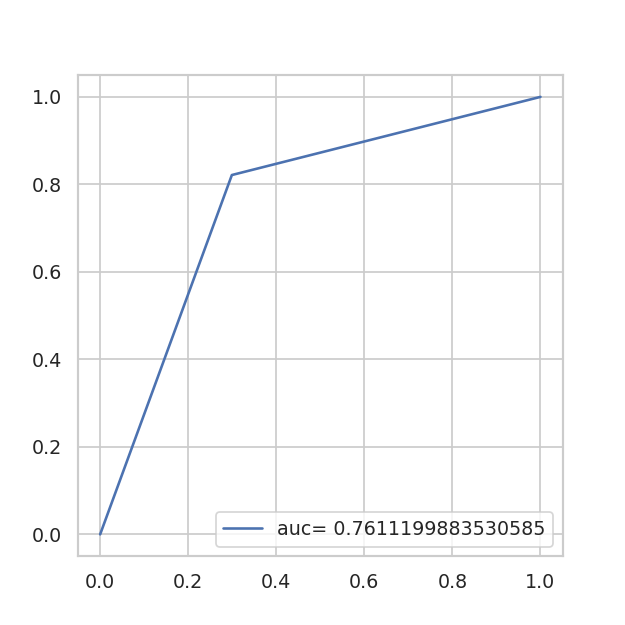

The ROC Curve for Gradient Boosting Model is: 0.7611199883530585


<IPython.core.display.Javascript object>


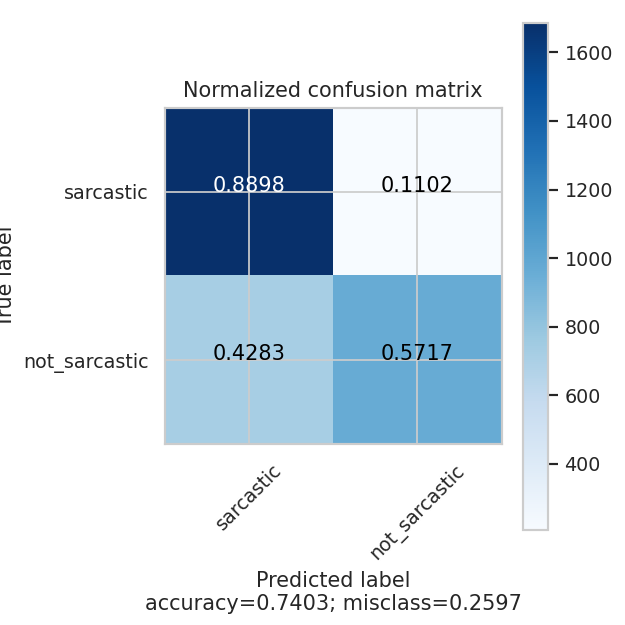

Applying Random Forest
The accuracy achieved by the Random Forest Classifier Model is:  0.6231478892927034
The F1 Score achieved by the Random Forest Classifier Model is: 0.557194447546473


<IPython.core.display.Javascript object>


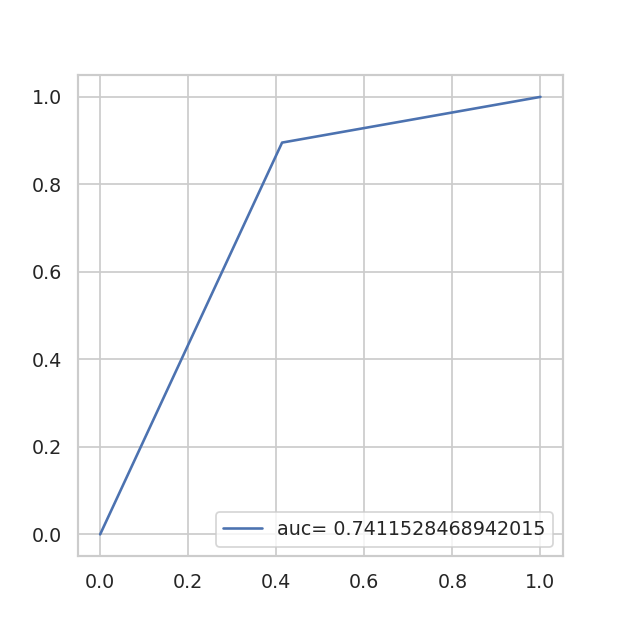

The ROC Curve for Random Forest Classifier Model is: 0.7411528468942015


<IPython.core.display.Javascript object>


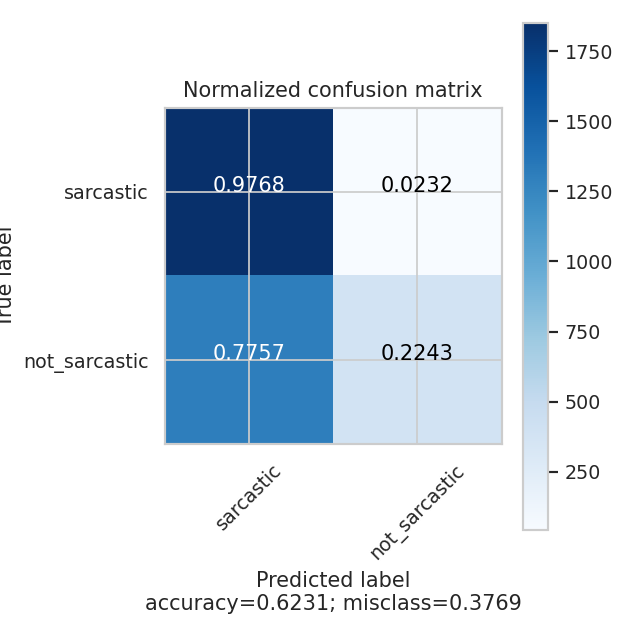

Applying LightGM Classifier
The accuracy achieved by the LightBM Classifier Model is:  0.7671232876712328
The F1 Score achieved by the LightBM Classifier Model is: 0.7663767326341628


<IPython.core.display.Javascript object>


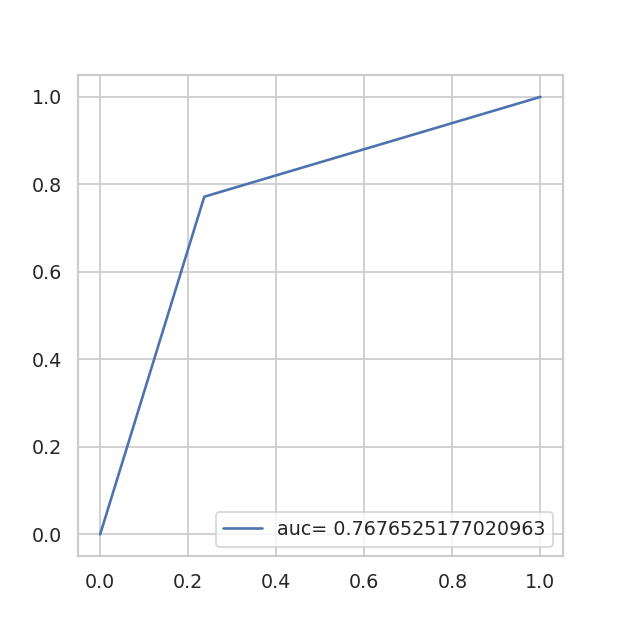

The ROC Curve for LightBM Classifier Classifier Model is: 0.7676525177020963


<IPython.core.display.Javascript object>


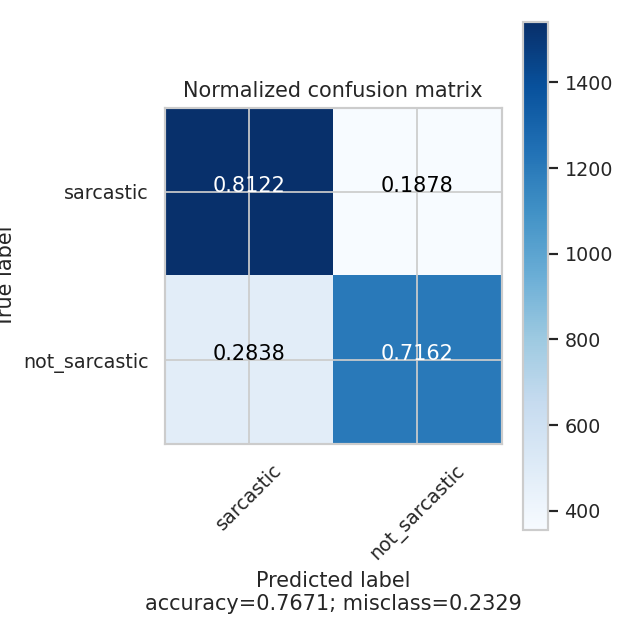

Applying Gradient Boosting
The accuracy achieved by the Gradient Boosting Classifier Model is:  0.685770198490355
The F1 Score achieved by the Gradient Boosting Classifier Model is: 0.6621529299347398


<IPython.core.display.Javascript object>


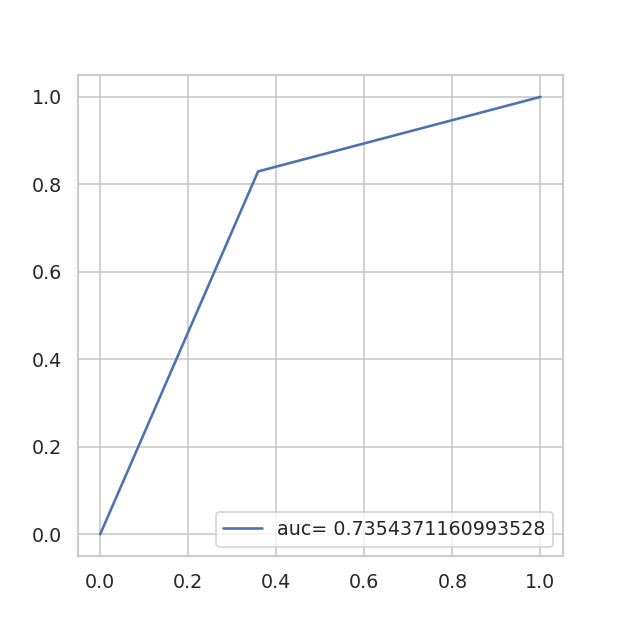

The ROC Curve for Gradient Boosting Model is: 0.7354371160993528


<IPython.core.display.Javascript object>


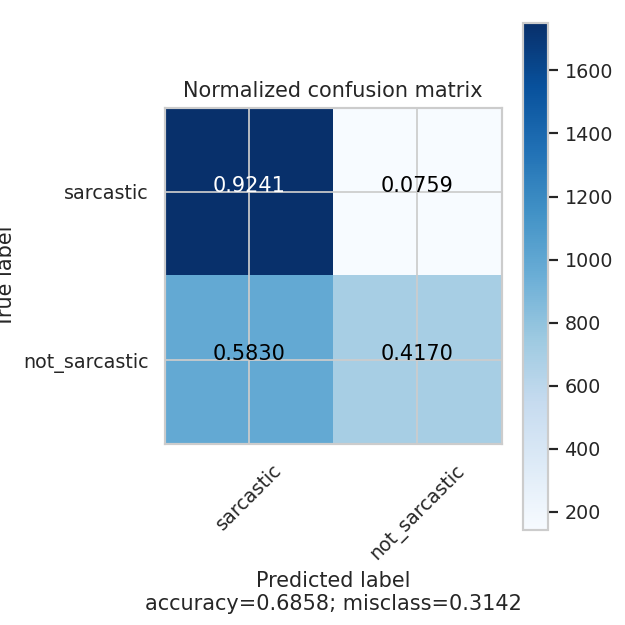

Applying Logistic Regression
The accuracy achieved by the Logistic Regression Classifier Model is:  0.7674028515515795
The F1 Score achieved by the Logistic Rgeression Classifier Model is: 0.7669001874057231


<IPython.core.display.Javascript object>


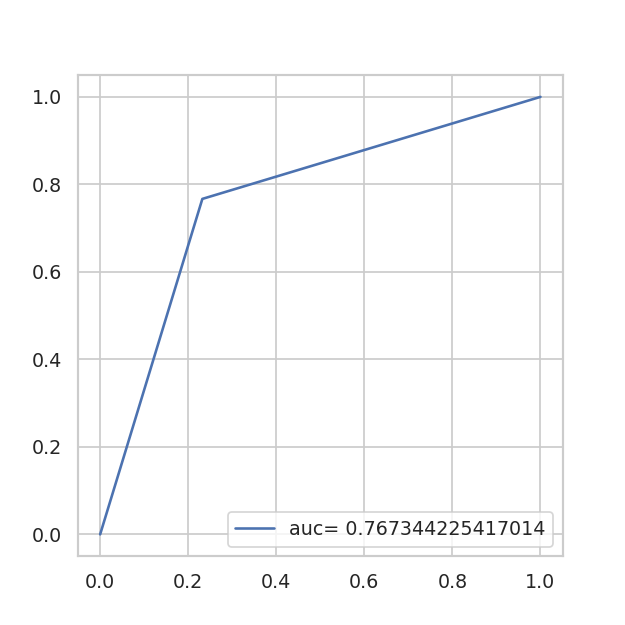

The ROC Curve for Logistic Regression Classifier Model is: 0.767344225417014


<IPython.core.display.Javascript object>


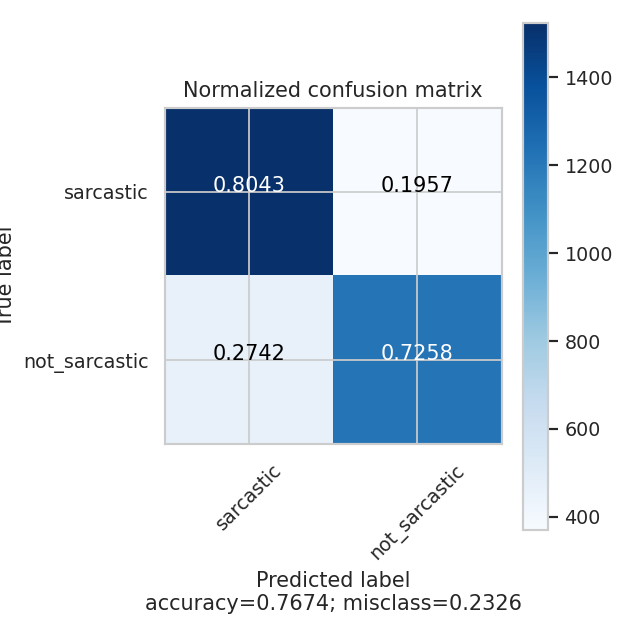

Applying AdaBoost Classifier
The accuracy achieved by the Adaboost Classifier Model is:  0.6924797316186748
The F1 Score achieved by the Adaboost Classifier Model is: 0.6750221109802131


<IPython.core.display.Javascript object>


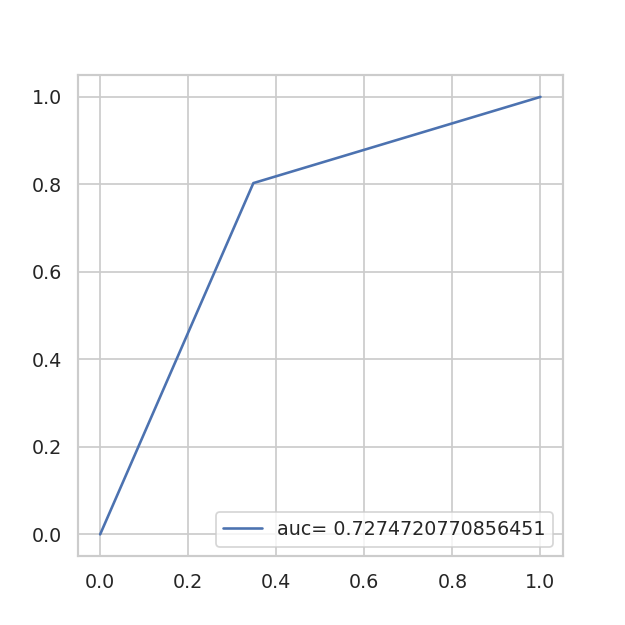

The ROC Curve for Adaboost Classifier Model is: 0.7274720770856451


<IPython.core.display.Javascript object>


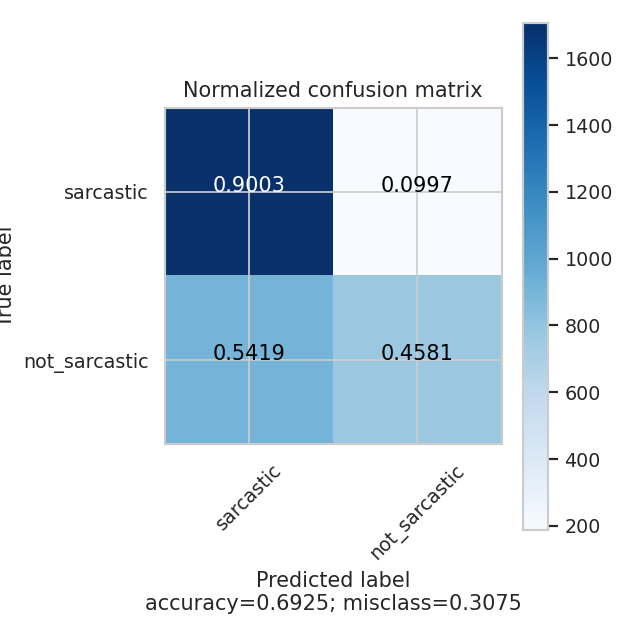

(3578, 2000)
(3578,)
Test Set Evaluation
The accuracy achieved by the Tuned Classifier Model is:  0.771939631078815
The F1 Score achieved by the Tuned Classifier Model is: 0.7711541211260851


In [107]:
import numpy as np 
import pandas as pd 
#from apply_ml import *
#from feature_engineering import *
from sklearn.model_selection import KFold

#--------------------------------------------------------------------------------------------------------------------------------------------------


#cross_val_type = 'Hold_Out'
#cross_val_type = 'Stratified_KFold'

#feature_list = list(train_features.columns)

# Apply Hold One Out Cross validation
model_crossval,test_features_preprocessed = apply_hold_one_out_crossval(train_features,val_features,test_features,y_train,y_val,target_names)

print(test_features_preprocessed.shape)
print(y_test.shape)

test_evaluation(model_crossval, test_features_preprocessed, y_test)

### Stratified 5 Fold Cross Validation with XgBoost with Grid Search

In [77]:
train_full_features = tfidfconverter.fit_transform(train_df['processed_headline']).toarray()
y_train = np.array(train_df['is_sarcastic'].tolist())

test_features = tfidfconverter.transform(test_df['processed_headline']).toarray()
y_test = np.array(val_df['is_sarcastic'].tolist())


nsplit = 5

#Apply Stratified KFold Cross Validation and Hyperparameter Grid search for XgGoost Model and train the model on complete training set
tuned_final_model, test_features_preprocessed = apply_stratified_kfold_crossval_grid_search(train_full_features,test_features,y_train,nsplit)
test_evaluation(tuned_final_model, test_features_reduced, y_test)

Applying Data Preprocessing
Apply Stratified Cross Validation and Grid Search
Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[15:25:19] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:28:51] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:32:23] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:35:48] WARNING: ..

[16:43:33] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:45:57] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:48:21] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:50:45] WARNING: ..

KeyboardInterrupt: 

### Stratified 5 Fold Cross Validation with XgBoost with Random Search

In [ ]:
train_full_features = tfidfconverter.fit_transform(train_df['processed_headline']).toarray()
y_train = np.array(train_df['is_sarcastic'].tolist())

test_features = tfidfconverter.transform(test_df['processed_headline']).toarray()
y_test = np.array(val_df['is_sarcastic'].tolist())


nsplit = 5

#Apply Stratified KFold Cross Validation and Hyperparameter Grid search for XgGoost Model and train the model on complete training set
tuned_final_model, test_features_preprocessed = apply_stratified_kfold_crossval_random_search(train_full_features,test_features,y_train,nsplit)
test_evaluation(tuned_final_model, test_features_reduced, y_test)

#### TODO

In [ ]:
# Stratified Cross Validation on 

In [ ]:
# AUC Curve